In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
X = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\Iris.csv')

In [3]:
X.drop(['Id','Species'], axis=1, inplace=True)


In [4]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

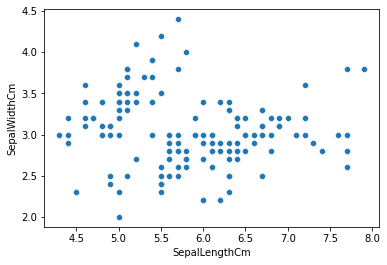

In [6]:
sns.scatterplot(data=X,x= 'SepalLengthCm',y= 'SepalWidthCm')

In [7]:
# init centers
centers = X.sample(3)


In [42]:
centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.850000,3.073684,5.742105,2.071053
146,5.901613,2.748387,4.393548,1.433871
86,5.006000,3.418000,1.464000,0.244000


In [41]:
# X.iloc[:, :]
# # centers.iloc[0,:]
# shit = (((X.iloc[:, :] - centers.iloc[0,:])**2).sum(axis=1))**0.5
# shit
# X.iloc[:, :]
centers.iloc[1,:]

SepalLengthCm    5.901613
SepalWidthCm     2.748387
PetalLengthCm    4.393548
PetalWidthCm     1.433871
Name: 146, dtype: float64

In [44]:
distances = np.zeros((len(X.index),3))

for i in range(3):
    distances[:,i] = (((X.iloc[:, :] - centers.iloc[i,:])**2).sum(axis=1))**0.5
distances

array([[5.0595416 , 3.41925061, 0.14694217],
       [5.11494335, 3.39857426, 0.43816892],
       [5.27935534, 3.56935666, 0.41230086],
       [5.15358977, 3.42240962, 0.51883716],
       [5.10433388, 3.46726403, 0.19796969],
       [4.68148797, 3.14673162, 0.68380699],
       [5.21147652, 3.51650264, 0.41520116],
       [5.00252706, 3.33654987, 0.0599333 ],
       [5.32798107, 3.57233779, 0.80099438],
       [5.06790865, 3.3583767 , 0.36659514],
       [4.89806763, 3.32449131, 0.48784424],
       [4.9966845 , 3.31126872, 0.25138019],
       [5.19103612, 3.46661272, 0.49192682],
       [5.65173594, 3.90578362, 0.90906105],
       [5.10804455, 3.646649  , 1.02019214],
       [4.88564095, 3.49427881, 1.21309192],
       [5.03090587, 3.495248  , 0.66241377],
       [5.02342022, 3.38444981, 0.1509702 ],
       [4.61792995, 3.11245944, 0.82848778],
       [4.97213426, 3.37738931, 0.39898872],
       [4.6955761 , 3.07471224, 0.46172719],
       [4.9236821 , 3.31506588, 0.33762701],
       [5.

In [23]:
closest = np.argmin(distances, axis = 1)

In [24]:
closest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [32]:
X[closest == 0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [26]:
centers.reset_index().drop('index',axis=1,inplace=True)

In [27]:
centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,5.35977,3.093103,2.767816,0.758621
146,6.30000,2.500000,5.000000,1.900000
86,6.70000,3.100000,4.700000,1.500000


In [28]:
for i in range(3):
    for j in range(len(X.index)):
        centers.iloc[0] = X[closest == i].mean(axis=0)

In [29]:
centers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.448571,3.045714,4.751429,1.534286
146,6.300000,2.500000,5.000000,1.900000
86,6.700000,3.100000,4.700000,1.500000


array([2, 1, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0],
      dtype=int64)

array([0.55084464, 0.15675788])

SepalLengthCm    5.497468
SepalWidthCm     3.194937
PetalLengthCm    2.988608
PetalWidthCm     0.870886
dtype: float64

In [37]:
np.random.seed(4160659)
# X[closest == 0].mean(axis=0)
centers = X.sample(3)
distances = np.zeros((len(X.index),3))


while True:
    old_closest = closest.copy()
#     for iteration in range(10):
    print(closest)
    
    for i in range(3):
        distances[:,i] = (((X.iloc[:, :] - centers.iloc[i,:])**2).sum(axis=1))**0.5
    closest = np.argmin(distances, axis = 1)

    for i in range(3):
        for j in range(len(X.index)):
            centers.iloc[(i-1)] = X[closest == i].mean(axis=0)

    if all(closest == old_closest):
        break

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0
 0 2 2 2 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 2 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1
 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1 1 2 1 2 2 1 2 1 2 1 0 2 0 2 0 1 0 1
 1 1 1 1 1 2 2 2 2 0 0 1 1 1 2 2 0 1 2 2 1 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 

KeyboardInterrupt: 

In [19]:
len(closest)

150

In [28]:
def kmenas(X,k):

    x = X.shape[0]
    centers = X[np.random.choice(n,k,replace=False)]
    closest =np.zeros(n).astype(int)


    while True:
        old_closest = closest.copy()
    #     for iteration in range(10):
        print(closest)
        distances = cdist(X,centers)
        closest = np.argmin(distances,axis=1)

        for i in range(k):
            centers[i,:] = X[closest == i].mean(axis=0)

        if all(closest == old_closest):
            break
            
    return closest, centers

In [30]:
labels, centers = kmenas(X,3)
print(labels)
print(centers)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 2 2 1 2 1 1 0 1 2 2 0 2 1 1 0 0 2]
[0 1 0 2 2 1 2 1 1 0 1 2 1 0 2 1 1 0 0 2]
[0 1 0 2 2 1 2 1 1 0 1 2 1 0 2 1 1 0 0 2]
[[0.56944108 0.8141337 ]
 [0.80751961 0.18099668]
 [0.42090709 0.25537674]]


In [35]:
for i in range(3):
    print(i)

0
1
2
